In [2]:
#necessário atualizar scikit-learn
# pip install scikit-learn==1.2.2

## Qualidade de hospitais


**Dataset disponível em**: https://drive.google.com/file/d/1YZTr2SDZQJQjPmVGvq9WfpuR0j25ALmu/view?usp=sharing <br>


**Contexto**<br>
O presente dataset nos dá informações sobre a qualidade de hospitais fictícios. A partir de tais informações, objetivamos identificar, para cada caso (cliente), qual o melhor hospital.<br>

Para isto, temos as seguintes colunas:<br>

<br>**Nome do Hospital**: O nome identificador único do hospital.
<br>**Localização**: O local físico onde o hospital está situado, incluindo cidade, estado e país.
<br>**Especialidades Médicas**: As diversas áreas de especialização médica que o hospital oferece.
<br>**Número de Leitos**: O total de leitos disponíveis no hospital para internação de pacientes.
<br>**Avaliação de Qualidade**: Uma medida qualitativa da excelência dos serviços prestados pelo hospital, muitas vezes baseada em avaliações de pacientes ou organizações de saúde.
<br>**Taxas de Mortalidade**: As taxas de mortalidade associadas aos tratamentos e procedimentos médicos realizados no hospital.
<br>**Taxas de Readmissão**: A frequência com que os pacientes precisam ser readmitidos no hospital após a alta inicial.
<br>**Tempo de Espera**: O tempo médio que os pacientes esperam para receber atendimento médico ou serem admitidos no hospital.
<br>**Recursos e Equipamentos**: Uma lista dos recursos e equipamentos médicos disponíveis no hospital para diagnóstico e tratamento.
<br>**Número de Médicos**: O total de médicos empregados pelo hospital em tempo integral ou parcial.
<br>**Número de Enfermeiros**: O total de enfermeiros registrados ou auxiliares de enfermagem que trabalham no hospital.
<br>**Distância até o Centro da Cidade**: A distância geográfica entre o hospital e o centro da cidade mais próximo.
<br>**Taxa de Ocupação dos Leitos**: A proporção de leitos ocupados em relação ao total de leitos disponíveis no hospital.
<br>**Índice de Recursos Médicos**: Uma medida quantitativa dos recursos médicos disponíveis no hospital, como equipamentos avançados e instalações de última geração.
<br>**Diversidade de Especialidades Médicas**: O número e variedade de especialidades médicas representadas pelos profissionais de saúde do hospital.
<br>**Densidade Populacional**: A densidade populacional da área servida pelo hospital, indicando o número médio de pessoas por unidade de área, como quilômetro quadrado.

**Bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Importando dataset**

In [1]:
#utilizar se estiver no colab
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#dataset_path = '/content/drive/My Drive/FIAP/Challenge Plusoft/IA/dataset_hospitais.csv' #<--utilizar se estiver no colab
data = pd.read_csv('dataset_hospitais.csv')

In [8]:
data.head()

Nome do Hospital  Localização Especialidades Médicas  Número de Leitos  \
0       Hospital 0         Brás              Pediatria               120   
1       Hospital 1  Barra Funda              Ortopedia               150   
2       Hospital 2   Bom Retiro            Cardiologia               391   
3       Hospital 3      Butantã              Pediatria               259   
4       Hospital 4   Bela Vista            Cardiologia               491   

   Avaliação de Qualidade  Taxas de Mortalidade  Taxas de Readmissão  \
0                       4              4.464740            19.436610   
1                       3              2.010704             0.341199   
2                       2              0.837485            10.670911   
3                       4              3.335686            19.675194   
4                       3              4.279169             8.321560   

   Tempo de Espera  Recursos e Equipamentos  Número de Médicos  \
0              173                       48                 97   
1               83                       19                 18   
2               42                       37                 31   
3               31                       44                 77   
4              123                       17                 16   

   Número de Enfermeiros  Distância até o Centro da Cidade  \
0                     38                          1.881659   
1                    126                          4.680412   
2                    162                          2.905182   
3                    166                          9.329435   
4                    162                          1.536253   

   Taxa de Ocupação dos Leitos  Índice de Recursos Médicos  \
0                     0.952251                    1.525000   
1                     0.609473                    1.086667   
2                     0.698884                    0.588235   
3                     0.731551                    1.108108   
4                     0.828271                    0.397149   

   Diversidade de Especialidades Médicas  Densidade Populacional  
0                                      1                    9051  
1                                      1                    9214  
2                                      3                    2992  
3                                      1                    8515  
4                                      5                    8952

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Nome do Hospital                       200 non-null    object 
 1   Localização                            200 non-null    object 
 2   Especialidades Médicas                 200 non-null    object 
 3   Número de Leitos                       200 non-null    int64  
 4   Avaliação de Qualidade                 200 non-null    int64  
 5   Taxas de Mortalidade                   200 non-null    float64
 6   Taxas de Readmissão                    200 non-null    float64
 7   Tempo de Espera                        200 non-null    int64  
 8   Recursos e Equipamentos                200 non-null    int64  
 9   Número de Médicos                      200 non-null    int64  
 10  Número de Enfermeiros                  200 non-null    int64  
 11  Distân

# Análise exploratória

In [10]:
data.describe().T

count         mean          std  \
Número de Leitos                       200.0   262.890000   121.399038   
Avaliação de Qualidade                 200.0     3.095000     1.387661   
Taxas de Mortalidade                   200.0     2.529215     1.266581   
Taxas de Readmissão                    200.0    10.178486     5.995823   
Tempo de Espera                        200.0   103.110000    44.584040   
Recursos e Equipamentos                200.0    28.315000    12.397754   
Número de Médicos                      200.0    52.540000    27.207714   
Número de Enfermeiros                  200.0   112.840000    50.198945   
Distância até o Centro da Cidade       200.0     4.696539     3.148919   
Taxa de Ocupação dos Leitos            200.0     0.759744     0.144990   
Índice de Recursos Médicos             200.0     0.989771     0.746181   
Diversidade de Especialidades Médicas  200.0     3.140000     1.432010   
Densidade Populacional                 200.0  5412.055000  2504.161592   

                                               min          25%          50%  \
Número de Leitos                         52.000000   160.500000   255.000000   
Avaliação de Qualidade                    1.000000     2.000000     3.000000   
Taxas de Mortalidade                      0.500110     1.390049     2.420124   
Taxas de Readmissão                       0.312245     5.169109     9.826122   
Tempo de Espera                          30.000000    66.000000    98.500000   
Recursos e Equipamentos                   5.000000    18.750000    30.000000   
Número de Médicos                        10.000000    29.000000    47.500000   
Número de Enfermeiros                    20.000000    69.750000   115.000000   
Distância até o Centro da Cidade          1.536253     1.881659     2.905182   
Taxa de Ocupação dos Leitos               0.503060     0.626262     0.764670   
Índice de Recursos Médicos                0.149758     0.513289     0.752809   
Diversidade de Especialidades Médicas     1.000000     2.000000     3.000000   
Densidade Populacional                 1024.000000  3233.000000  5503.000000   

                                               75%          max  
Número de Leitos                        369.250000   498.000000  
Avaliação de Qualidade                    4.000000     5.000000  
Taxas de Mortalidade                      3.597982     4.942570  
Taxas de Readmissão                      15.623466    19.980233  
Tempo de Espera                         143.250000   178.000000  
Recursos e Equipamentos                  38.000000    49.000000  
Número de Médicos                        78.000000    99.000000  
Número de Enfermeiros                   153.250000   199.000000  
Distância até o Centro da Cidade          8.123742     9.800828  
Taxa de Ocupação dos Leitos               0.884461     0.996537  
Índice de Recursos Médicos                1.194614     4.769231  
Diversidade de Especialidades Médicas     4.000000     5.000000  
Densidade Populacional                 7588.000000  9822.000000

**Matriz de correlação**

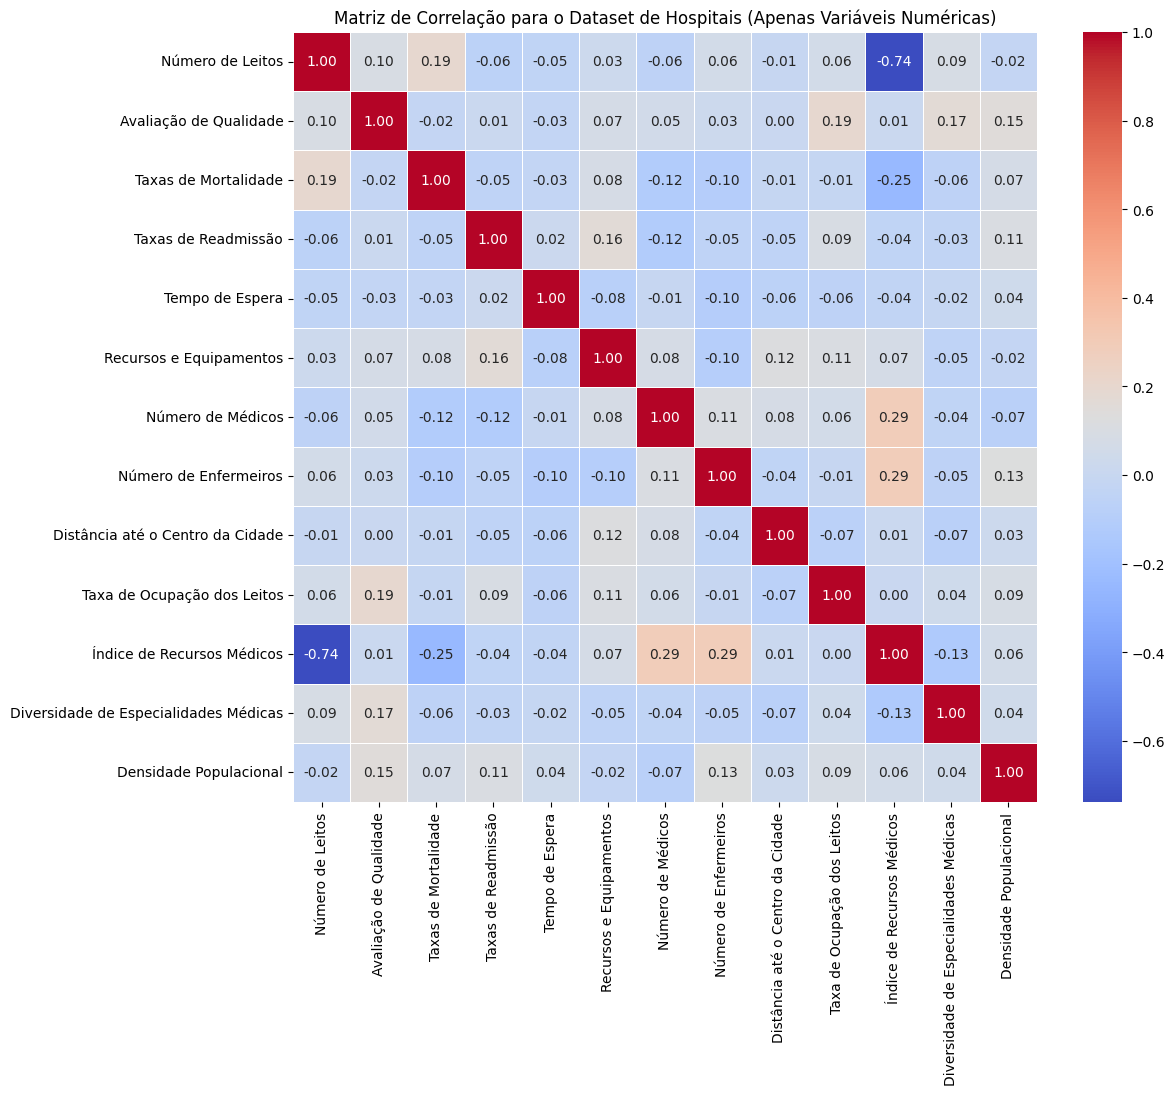

In [11]:
# Selecionar apenas as colunas numéricas do DataFrame
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_data.corr()

# Criar um mapa de calor
plt.figure(figsize=(12, 10))
heatmap = sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Matriz de Correlação para o Dataset de Hospitais (Apenas Variáveis Numéricas)')
plt.show()

A matriz de correlação nos mostra que não existem tanta relação entre as features. O que podemos destacar:

* Quanto maior a quantidade de recursos e equipamentos, maior a taxa de mortalidade (%). Isso pode ser um reflexo de que existe uma maior quantidade de procedimentos conforme existem ferramentais, consequentemente elevando a porcentagem de mortalidade.


**Principais especialidades médicas**

> Os hospitais possuem uma especialidade médica que se destaca



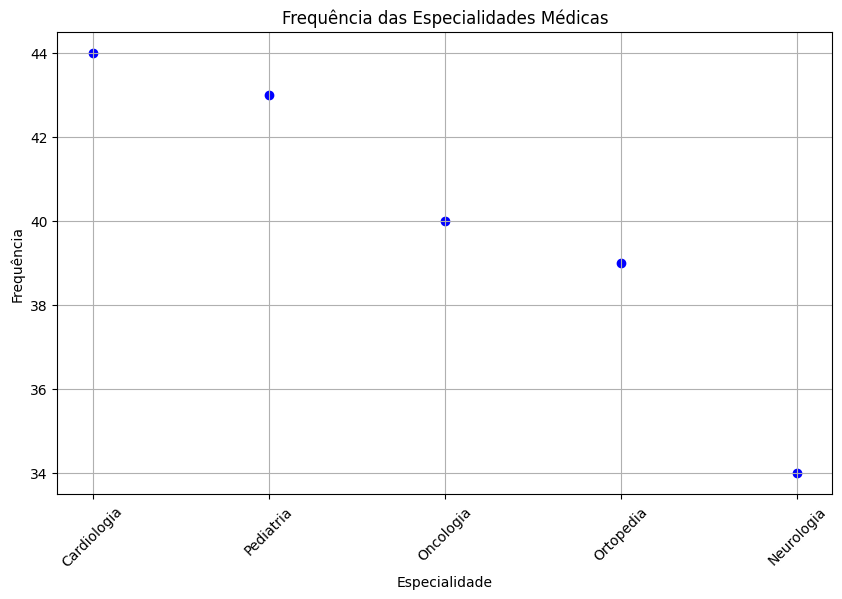

In [12]:
# Contar a frequência de cada especialidade
especialidades_freq = data['Especialidades Médicas'].value_counts()

# Criar um DataFrame com essas frequências
especialidades_df = especialidades_freq.reset_index()
especialidades_df.columns = ['Especialidade', 'Frequência']

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(especialidades_df['Especialidade'], especialidades_df['Frequência'], color='blue')

# Adicionar rótulos e título
plt.xlabel('Especialidade')
plt.ylabel('Frequência')
plt.title('Frequência das Especialidades Médicas')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar o gráfico
plt.show()

O gráfico de distribuição mostra uma alta oferta em hospitais especializados em cardiologia, talvez refletindo uma tendência de demanda.

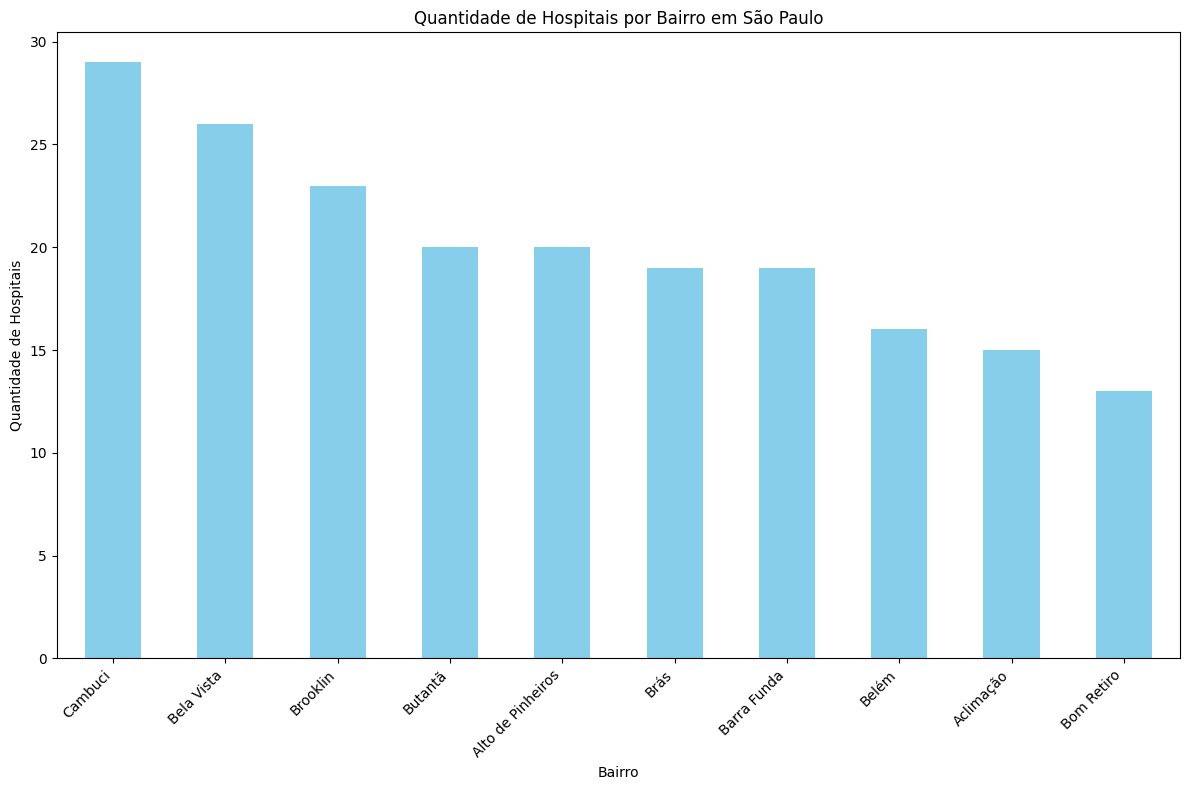

In [13]:
# Contagem de hospitais por bairro
contagem_por_bairro = data['Localização'].value_counts()

# Ordenar os bairros por quantidade de hospitais
contagem_por_bairro = contagem_por_bairro.sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
contagem_por_bairro.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Hospitais por Bairro em São Paulo')
plt.xlabel('Bairro')
plt.ylabel('Quantidade de Hospitais')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Preparo dos dados

**Identificando se existem valores ausentes**

In [14]:
# Verificar se há valores ausentes em cada coluna
missing_values = data.isnull().sum()

# Exibir o número de valores ausentes em cada coluna
print("Valores ausentes por coluna:")
print(missing_values)

# Verificar se há valores ausentes em todo o conjunto de dados
total_missing = data.isnull().sum().sum()

if total_missing == 0:
    print("\nNão há valores ausentes no conjunto de dados.")
else:
    print(f"\nHá um total de {total_missing} valores ausentes no conjunto de dados.")

Valores ausentes por coluna:
Nome do Hospital                         0
Localização                              0
Especialidades Médicas                   0
Número de Leitos                         0
Avaliação de Qualidade                   0
Taxas de Mortalidade                     0
Taxas de Readmissão                      0
Tempo de Espera                          0
Recursos e Equipamentos                  0
Número de Médicos                        0
Número de Enfermeiros                    0
Distância até o Centro da Cidade         0
Taxa de Ocupação dos Leitos              0
Índice de Recursos Médicos               0
Diversidade de Especialidades Médicas    0
Densidade Populacional                   0
dtype: int64

Não há valores ausentes no conjunto de dados.


In [15]:
#dropando coluna
data.drop(columns=['Nome do Hospital'], inplace=True)

In [16]:
data.head()

Localização Especialidades Médicas  Número de Leitos  \
0         Brás              Pediatria               120   
1  Barra Funda              Ortopedia               150   
2   Bom Retiro            Cardiologia               391   
3      Butantã              Pediatria               259   
4   Bela Vista            Cardiologia               491   

   Avaliação de Qualidade  Taxas de Mortalidade  Taxas de Readmissão  \
0                       4              4.464740            19.436610   
1                       3              2.010704             0.341199   
2                       2              0.837485            10.670911   
3                       4              3.335686            19.675194   
4                       3              4.279169             8.321560   

   Tempo de Espera  Recursos e Equipamentos  Número de Médicos  \
0              173                       48                 97   
1               83                       19                 18   
2               42                       37                 31   
3               31                       44                 77   
4              123                       17                 16   

   Número de Enfermeiros  Distância até o Centro da Cidade  \
0                     38                          1.881659   
1                    126                          4.680412   
2                    162                          2.905182   
3                    166                          9.329435   
4                    162                          1.536253   

   Taxa de Ocupação dos Leitos  Índice de Recursos Médicos  \
0                     0.952251                    1.525000   
1                     0.609473                    1.086667   
2                     0.698884                    0.588235   
3                     0.731551                    1.108108   
4                     0.828271                    0.397149   

   Diversidade de Especialidades Médicas  Densidade Populacional  
0                                      1                    9051  
1                                      1                    9214  
2                                      3                    2992  
3                                      1                    8515  
4                                      5                    8952

**Normalização e Padronização**

In [18]:
from sklearn.preprocessing import StandardScaler


numeric_features = ['Avaliação de Qualidade', 'Número de Leitos', 'Taxas de Mortalidade', 'Taxas de Readmissão', 'Tempo de Espera', 'Recursos e Equipamentos', 'Número de Médicos', 'Número de Enfermeiros']

# Inicialize o StandardScaler
scaler = StandardScaler()

# Ajuste e transforme as variáveis numéricas
data[numeric_features] = scaler.fit_transform(data[numeric_features])

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

In [19]:
data.head()

Localização Especialidades Médicas  Número de Leitos  \
0         Brás              Pediatria         -1.179981   
1  Barra Funda              Ortopedia         -0.932242   
2   Bom Retiro            Cardiologia          1.057928   
3      Butantã              Pediatria         -0.032123   
4   Bela Vista            Cardiologia          1.883725   

   Avaliação de Qualidade  Taxas de Mortalidade  Taxas de Readmissão  \
0                0.653813              1.531984             1.547970   
1               -0.068632             -0.410406            -1.644807   
2               -0.791078             -1.339019             0.082334   
3                0.653813              0.638328             1.587862   
4               -0.068632              1.385103            -0.310480   

   Tempo de Espera  Recursos e Equipamentos  Número de Médicos  \
0         1.571535                 1.591772           1.638196   
1        -0.452190                -0.753231          -1.272679   
2        -1.374109                 0.702288          -0.793674   
3        -1.621454                 1.268323           0.901266   
4         0.447243                -0.914956          -1.346372   

   Número de Enfermeiros  Distância até o Centro da Cidade  \
0              -1.494609                          1.881659   
1               0.262815                          4.680412   
2               0.981761                          2.905182   
3               1.061644                          9.329435   
4               0.981761                          1.536253   

   Taxa de Ocupação dos Leitos  Índice de Recursos Médicos  \
0                     0.952251                    1.525000   
1                     0.609473                    1.086667   
2                     0.698884                    0.588235   
3                     0.731551                    1.108108   
4                     0.828271                    0.397149   

   Diversidade de Especialidades Médicas  Densidade Populacional  
0                                      1                    9051  
1                                      1                    9214  
2                                      3                    2992  
3                                      1                    8515  
4                                      5                    8952

**Codificando colunas categóricas**

In [20]:
data_encoded = pd.get_dummies(data, columns=['Especialidades Médicas'], dtype=int)

In [21]:
data_encoded.head()

Localização  Número de Leitos  Avaliação de Qualidade  \
0         Brás         -1.179981                0.653813   
1  Barra Funda         -0.932242               -0.068632   
2   Bom Retiro          1.057928               -0.791078   
3      Butantã         -0.032123                0.653813   
4   Bela Vista          1.883725               -0.068632   

   Taxas de Mortalidade  Taxas de Readmissão  Tempo de Espera  \
0              1.531984             1.547970         1.571535   
1             -0.410406            -1.644807        -0.452190   
2             -1.339019             0.082334        -1.374109   
3              0.638328             1.587862        -1.621454   
4              1.385103            -0.310480         0.447243   

   Recursos e Equipamentos  Número de Médicos  Número de Enfermeiros  \
0                 1.591772           1.638196              -1.494609   
1                -0.753231          -1.272679               0.262815   
2                 0.702288          -0.793674               0.981761   
3                 1.268323           0.901266               1.061644   
4                -0.914956          -1.346372               0.981761   

   Distância até o Centro da Cidade  Taxa de Ocupação dos Leitos  \
0                          1.881659                     0.952251   
1                          4.680412                     0.609473   
2                          2.905182                     0.698884   
3                          9.329435                     0.731551   
4                          1.536253                     0.828271   

   Índice de Recursos Médicos  Diversidade de Especialidades Médicas  \
0                    1.525000                                      1   
1                    1.086667                                      1   
2                    0.588235                                      3   
3                    1.108108                                      1   
4                    0.397149                                      5   

   Densidade Populacional  Especialidades Médicas_Cardiologia  \
0                    9051                                   0   
1                    9214                                   0   
2                    2992                                   1   
3                    8515                                   0   
4                    8952                                   1   

   Especialidades Médicas_Neurologia  Especialidades Médicas_Oncologia  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   

   Especialidades Médicas_Ortopedia  Especialidades Médicas_Pediatria  
0                                 0                                 1  
1                                 1                                 0  
2                                 0                                 0  
3                                 0                                 1  
4                                 0                                 0

**Separando features e labels**

In [22]:
from sklearn.model_selection import train_test_split

# Separar os dados em features (X) e rótulos (y)
X = data_encoded.drop(columns=['Localização'])
y = data_encoded['Localização']

**Separando dados em treinamento e teste**

In [23]:
y

0             Brás
1      Barra Funda
2       Bom Retiro
3          Butantã
4       Bela Vista
          ...     
195          Belém
196      Aclimação
197       Brooklin
198     Bela Vista
199           Brás
Name: Localização, Length: 200, dtype: object

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(160, 18)

In [26]:
X_test.shape

(40, 18)

**Seleção de características com Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Criar um classificador de árvore de decisão
clf = RandomForestClassifier(random_state=42)

# Treinar o classificador
clf.fit(X_train, y_train)

# Selecionar as características mais importantes
feature_selector = SelectFromModel(clf, prefit=True)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

**Avaliação do modelo**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instanciar o modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Treinar o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
predictions = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do modelo:", accuracy)

# Outras métricas de avaliação
print(classification_report(y_test, predictions))

Acurácia do modelo: 0.65
                   precision    recall  f1-score   support

        Aclimação       0.00      0.00      0.00         4
Alto de Pinheiros       0.75      0.75      0.75         4
      Barra Funda       0.67      0.67      0.67         3
       Bela Vista       0.86      1.00      0.92         6
            Belém       0.33      1.00      0.50         1
       Bom Retiro       0.00      0.00      0.00         2
         Brooklin       1.00      0.67      0.80         3
             Brás       0.33      0.40      0.36         5
          Butantã       0.83      0.71      0.77         7
          Cambuci       0.62      1.00      0.77         5

         accuracy                           0.65        40
        macro avg       0.54      0.62      0.55        40
     weighted avg       0.60      0.65      0.61        40



c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

**Ajuste de Hiperparâmetros**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciar o modelo RandomForestClassifier
rf_model = RandomForestClassifier()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Treinar o modelo com os dados de treinamento
grid_search.fit(X_train, y_train)

# Avaliar o melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# Avaliar a acurácia do modelo otimizado nos dados de teste
accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Acurácia do modelo otimizado:", accuracy)


c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia do modelo otimizado: 0.675


c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciar o modelo RandomForestClassifier
rf_model = RandomForestClassifier()

# Criar o objeto GridSearchCV com validação cruzada de 5 folds
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Treinar o modelo com os dados de treinamento usando validação cruzada
grid_search.fit(X_train, y_train)

# Avaliar o melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# Avaliar a acurácia do modelo otimizado nos dados de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Acurácia do modelo otimizado:", accuracy)
print("Precisão do modelo otimizado:", precision)
print("Recall do modelo otimizado:", recall)
print("F1-score do modelo otimizado:", f1)

# Realizar validação cruzada e calcular as métricas de avaliação
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print("Acurácia média da validação cruzada:", cross_val_scores.mean())
print("Desvio padrão da acurácia na validação cruzada:", cross_val_scores.std())

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

Melhores hiperparâmetros encontrados:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia do modelo otimizado: 0.775
Precisão do modelo otimizado: 0.7375
Recall do modelo otimizado: 0.775
F1-score do modelo otimizado: 0.7433333333333333


c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

Acurácia média da validação cruzada: 0.73125
Desvio padrão da acurácia na validação cruzada: 0.054486236794258416


c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

**Retreinando o modelo pós atualização scikit-learn (vide inicio do documento)**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [32]:
# Criar um pipeline para padronizar os dados e treinar o modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Avaliar o modelo
accuracy = pipeline.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy}')

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

Acurácia do modelo: 0.625


# Avaliação final do modelo

In [33]:
# Treinar o modelo final com todos os dados disponíveis
final_model = RandomForestClassifier(**grid_search.best_params_)
final_model.fit(X, y)

# Avaliar o desempenho do modelo final
y_pred_final = final_model.predict(X)

# Calcular métricas de avaliação
accuracy_final = accuracy_score(y, y_pred_final)
precision_final = precision_score(y, y_pred_final, average='weighted')
recall_final = recall_score(y, y_pred_final, average='weighted')
f1_final = f1_score(y, y_pred_final, average='weighted')

print("Acurácia do modelo final:", accuracy_final)
print("Precisão do modelo final:", precision_final)
print("Recall do modelo final:", recall_final)
print("F1-score do modelo final:", f1_final)

c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

Acurácia do modelo final: 1.0
Precisão do modelo final: 1.0
Recall do modelo final: 1.0
F1-score do modelo final: 1.0


c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

**Salvando modelo em formato pkl**

In [34]:
import joblib

# Salvar o modelo final
joblib.dump(final_model, 'modelo_final_.pkl')

['modelo_final_.pkl']

O arquivo pkl é importante para a criação de uma api. Nesse caso será criada uma api utilizando flask.